# Loan Application Status Prediction
## Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

### Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv
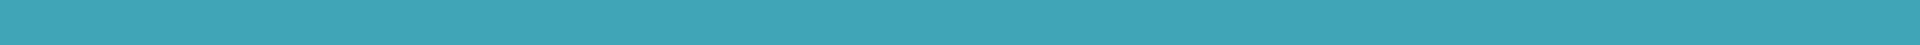

In [1]:
'''Importing Important libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In the given case study, we have 'Loan_Status' as the target variable. Also the label is categorical with two values, 'Y' and 'N'. Whe have to predict if the loan will be sanctioned for a given person or not. This is supervised classification machine learning problem. Moving ahead with the data.



# EXPLORATORY DATA ANALYSIS:
We start the EDA by looking at the datatypes of the features.

In [3]:
ds = data.copy()
ds.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We see that **the features 'Loan_id', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed' and 'Property_Area' are categorical features.** *Rest all the features are continous features*. The target variable is also a categorical column. 
### Descriptive Statistics-

In [46]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


We can draw some of the insights from the above descriptive statistics-
- The minimum amount of loan filled in the applications is 9. The highest loan amount is 700.
- Standard deviation is extremly high for 'ApplicantIncome' and 'CoapplicantIncome'. The data in these column is heavily spreaded
- The maximum applicant income is 81000, whereas minimum income is 150. The 75% quantile value is 5795. This suggests that there may be outliers present in the data.
- Similarly maximum co-applicant income is 41667, whereas minimum income is 0. The 75% quantile value is 2297.25. Outliers may be present in this column as well
- The longest loan amount term is 480, whereas smallest term is 12.

Now we have a look at the number of unique values in the categotical values.

In [4]:
ds.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

From the above, feature **'Loan_Id' is a unique identification and it is not requires for the model building, so it will be dropped from the dataset**. For the rest of the categorical features, *we can encode them using the ordinal encoding or one-hot-encoding. Target can be encoded by label encoding.*
## NULL VALUES HANDLING:
We first check if there are any null values present in the dataset using the heatmap.

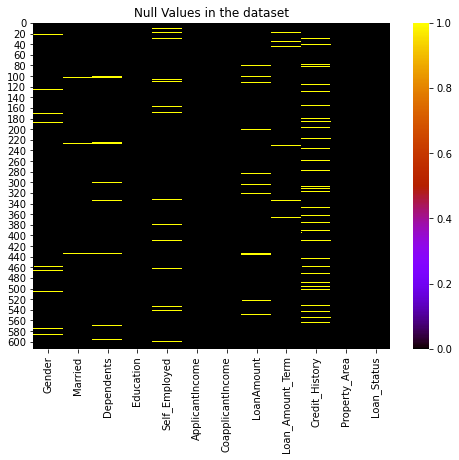

In [5]:
ds.drop(['Loan_ID'], axis = 1, inplace =True) # dropping 'Loan_Id'

plt.figure(figsize = (8, 6))
plt.title("Null Values in the dataset")
sns.heatmap(ds.isnull(), cmap = "gnuplot")
plt.show()

In [6]:
ds.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

From the above function and heat map, we see that there are some null values present in features 'Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term' and 'Credit_History'. We will fill these random values using the mean, median or mode wherever necessary.

### Working on features one by one:
**'Gender'**- Starting with the gender column, we first fill the null values with the mode of this column, then we look at the relation with the target variable.

In [7]:
ds['Gender'].fillna(ds['Gender'].mode()[0], inplace=True)

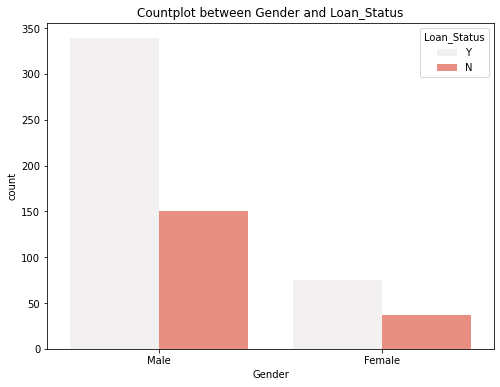

In [10]:
#plt.style.use('seaborn-pastel')

plt.figure(figsize=(8,6))
plt.title("Countplot between Gender and Loan_Status")
sns.countplot(x = data['Gender'],color = 'salmon', hue = data['Loan_Status'])
plt.show()

Majority of male got their loan approved out of total males. Also, more men applied for loan than women.

**'Dependents'**-

In [11]:
ds['Dependents'].fillna(ds['Dependents'].mode()[0], inplace=True)

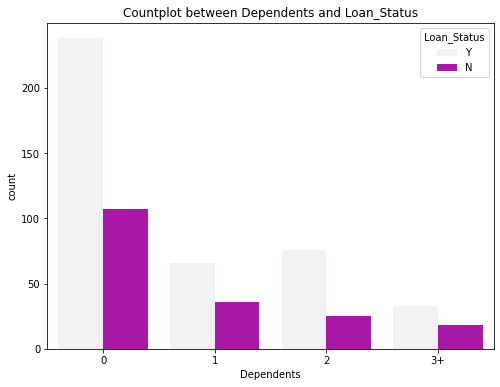

In [12]:
plt.figure(figsize=(8,6))
plt.title("Countplot between Dependents and Loan_Status")
sns.countplot(x = data['Dependents'],color = 'm', hue = data['Loan_Status'])
plt.show()

Out of the total loan applicants, more number of people applied for loan who doesn't have any dependents on them. The number of loan applications kept on decreasing as the number of dependents increased.

**'Married'**-

In [13]:
ds['Married'].fillna(ds['Married'].mode()[0], inplace=True)

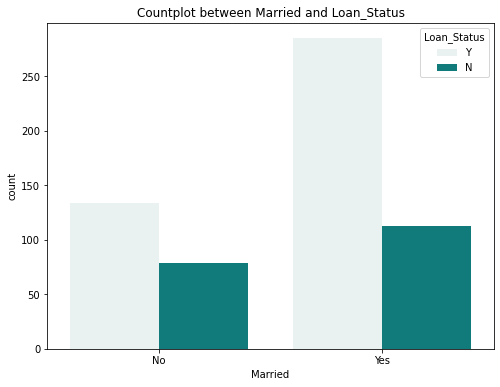

In [14]:
plt.figure(figsize=(8,6))
plt.title("Countplot between Married and Loan_Status")
sns.countplot(x = data['Married'],color = 'darkcyan', hue = data['Loan_Status'])
plt.show()

Married person applied fo loan far more than unmarried person. Majority of married population got their loan sanctioned.

**'Self_Employed'**-

In [15]:
ds['Self_Employed'].fillna(ds['Self_Employed'].mode()[0], inplace=True)


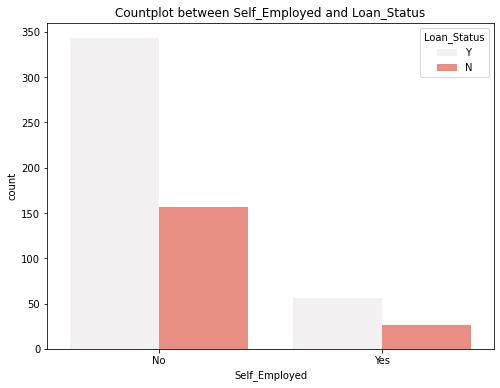

In [16]:
plt.figure(figsize=(8,6))
plt.title("Countplot between Self_Employed and Loan_Status")
sns.countplot(x = data['Self_Employed'],color = 'salmon', hue = data['Loan_Status'])
plt.show()

People who are self-employed applied far less loan than people who are working for someone else.

**'LoanAmount'**-

In [18]:
from scipy.stats import mode
loanamt_mode = ds.pivot_table(values='LoanAmount', columns=['Education', 'Self_Employed'],aggfunc= (lambda x:mode(x).mode[0]))
loanamt_mode

Education     Graduate        Not Graduate       
Self_Employed       No    Yes           No    Yes
LoanAmount       120.0  160.0        110.0  125.0

In [19]:
ds['LoanAmount'].replace(np.NaN, 0.0, inplace = True)

# replacing null values with mode of this column, grouped by 'Education' and 'Self_Employed'
ds['LoanAmount'].loc[(ds['LoanAmount'] == 0.0)&(ds['Education'] == 'Graduate')&(ds['Self_Employed'] == 'No')] = 120.0
ds['LoanAmount'].loc[(ds['LoanAmount'] == 0.0)&(ds['Education'] == 'Graduate')&(ds['Self_Employed'] == 'Yes')] = 160.0
ds['LoanAmount'].loc[(ds['LoanAmount'] == 0.0)&(ds['Education'] == 'Not Graduate')&(ds['Self_Employed'] == 'No')] = 110.0
ds['LoanAmount'].loc[(ds['LoanAmount'] == 0.0)&(ds['Education'] == 'Not Graduate')&(ds['Self_Employed'] == 'Yes')] = 125.0

**'Loan_Amount_Term'**-

In [20]:
loanamt_term_mode = ds.pivot_table(values='Loan_Amount_Term', columns='LoanAmount',aggfunc= (lambda x:mode(x).mode[0]))
loanamt_term_mode

LoanAmount,9.0,17.0,25.0,26.0,30.0,35.0,36.0,40.0,42.0,44.0,...,436.0,480.0,490.0,495.0,496.0,500.0,570.0,600.0,650.0,700.0
Loan_Amount_Term,360.0,120.0,120.0,360.0,360.0,360.0,360.0,180.0,180.0,360.0,...,360.0,360.0,180.0,360.0,360.0,360.0,360.0,180.0,480.0,300.0


In [22]:
# location of null values
loc1 = ds['Loan_Amount_Term'].isnull()

# replacing the null values in 'Loan_Amount_Term' by mode, and grouping it by 'LoanAmount'
ds.loc[loc1, 'Loan_Amount_Term'] = ds.loc[loc1,'LoanAmount'].apply(lambda x: loanamt_term_mode[x])

**'Credit_History'**-

In [23]:
ds['Credit_History'].fillna(ds['Credit_History'].mode()[0], inplace=True)

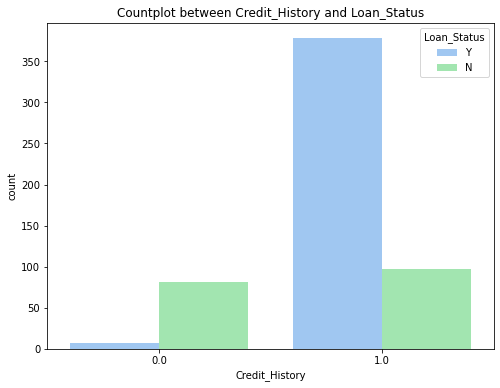

In [24]:
plt.figure(figsize=(8,6))
plt.title("Countplot between Credit_History and Loan_Status")
sns.countplot(x = data['Credit_History'], hue = data['Loan_Status'])
plt.show()

People with a credit history applied for loan in a much greater number than the people who have no credit history.

**'Education'**-

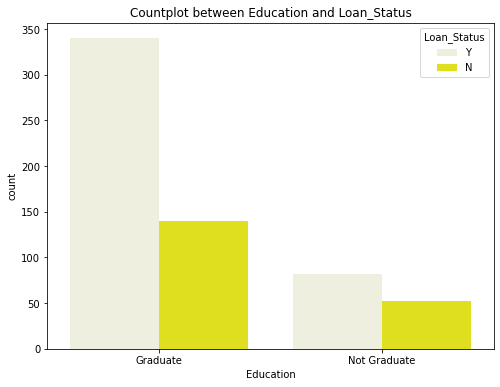

In [25]:
plt.figure(figsize=(8,6))
plt.title("Countplot between Education and Loan_Status")
sns.countplot(x = data['Education'],color = 'yellow', hue = data['Loan_Status'])
plt.show()

Graduate loan applications are greater in number than non-graduate applications.

**'Property_Area'**-

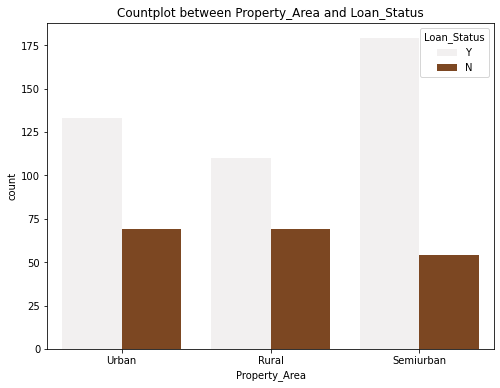

In [26]:
plt.figure(figsize=(8,6))
plt.title("Countplot between Property_Area and Loan_Status")
sns.countplot(x = data['Property_Area'],color = 'saddlebrown', hue = data['Loan_Status'])
plt.show()

People who are living in semi-urban area applied for the most loan, followed by the population of urban area. Least loan applications were received from the Rural area.

We have looked at the number of loan applications according to all the categorical features and drawn insights from them. Also, **we have removed the null values from the dataset**. We will check it again using the heatmap.

In [27]:
plt.style.use('default')

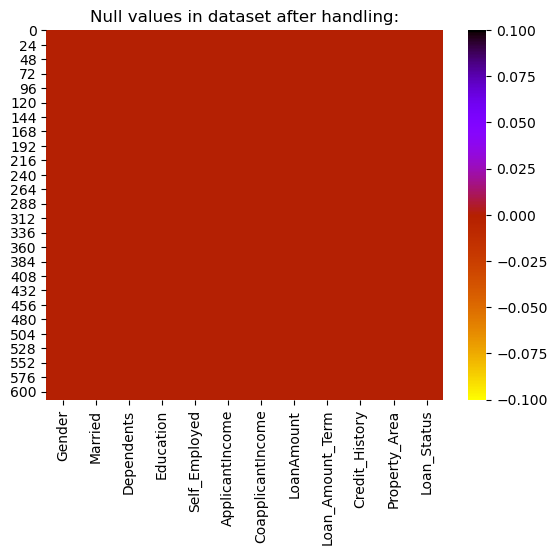

In [29]:
plt.title("Null values in dataset after handling:")
sns.heatmap(ds.isnull(), cmap = "gnuplot_r")
plt.show()

As we can see that no null values are now present in the dataset.

## ENCODING:
Moving ahead with encoding the categorical features using ordinal encoding and one-hot encoding where ever necessary.

In [30]:
# One-hot encoding
ds['Gender'] = ds['Gender'].map({'Male' : 1, 'Female' : 0})
ds['Married'] = ds['Married'].map({'Yes' : 1, 'No' : 0})
ds['Self_Employed'] = ds['Self_Employed'].map({'Yes' : 1, 'No' : 0})
ds['Education'] = ds['Education'].map({'Graduate' : 1, 'Not Graduate' : 0})

# Ordinal Encoding
ds['Property_Area'] = ds['Property_Area'].map({'Urban' : 2, 'Semiurban' : 1, 'Rural' : 0})

# Label Encoding
ds['Loan_Status'] = ds['Loan_Status'].map({'Y' : 1, 'N' : 0})

In [32]:
ds['Dependents'] = ds['Dependents'].str.replace('+', '')
ds['Dependents'] = ds['Dependents'].astype(np.int64)

# Checking the datatypes of the features after encoding
ds.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

As we can see that the values have now been encoded.

## OUTLIERS (Detection and Removal):
we check for the outliers in the continoue features of the dataset using boxplots.

In [33]:
plt.style.use('ggplot')

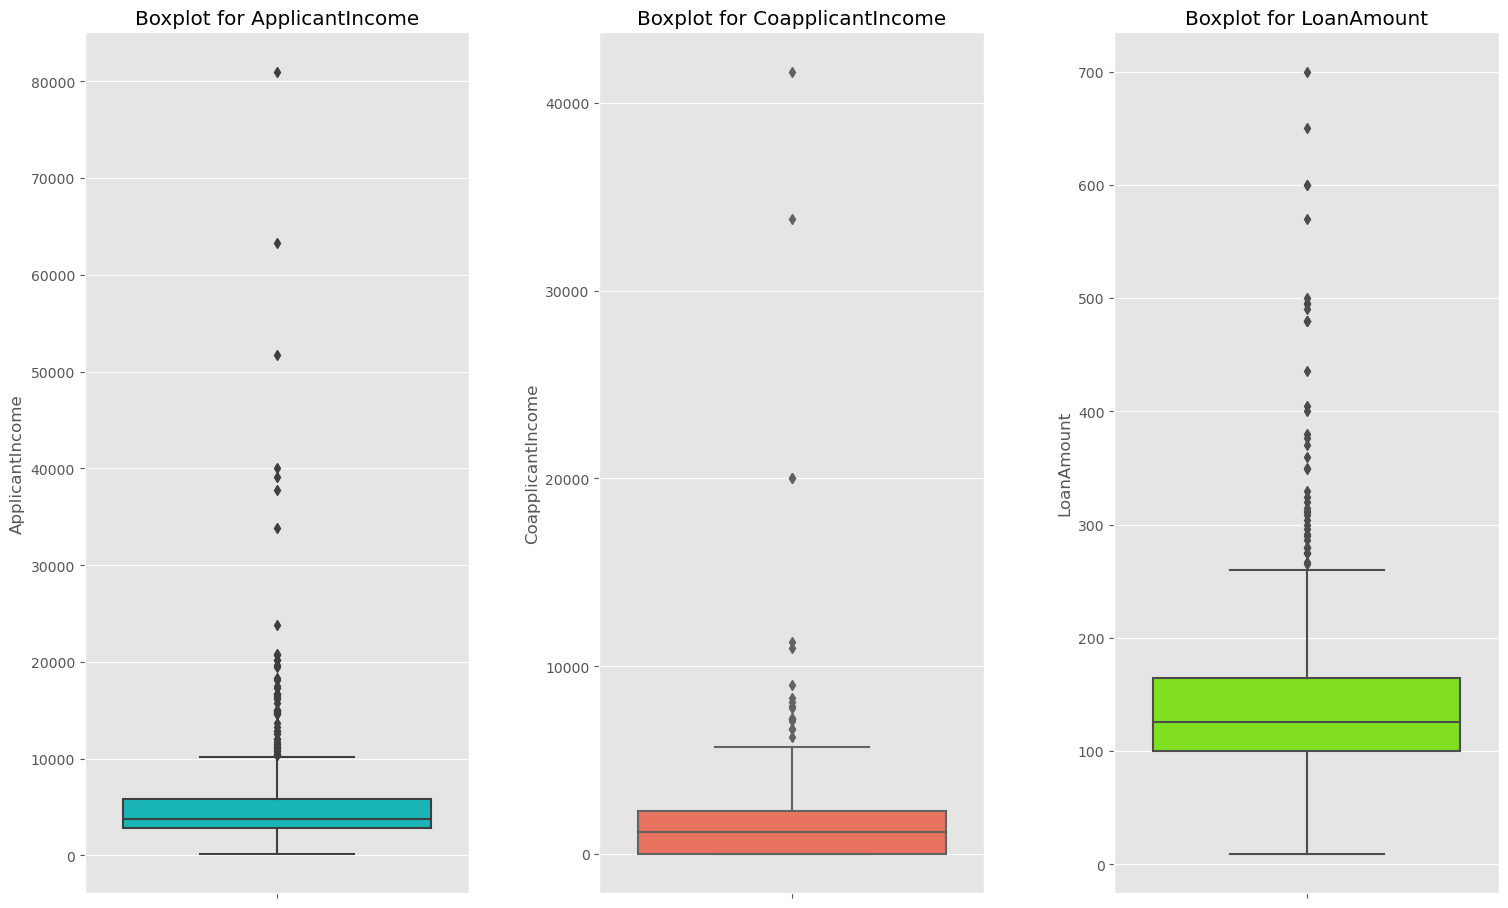

In [34]:
# clist = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
plt.figure(figsize = (16, 10))

plt.subplot(1, 3, 1)
sns.boxplot(y = ds['ApplicantIncome'], color = 'darkturquoise')
plt.title("Boxplot for ApplicantIncome")

plt.subplot(1, 3, 2)
sns.boxplot(y = ds['CoapplicantIncome'], color = 'tomato')
plt.title("Boxplot for CoapplicantIncome")

plt.subplot(1, 3, 3)
sns.boxplot(y = ds['LoanAmount'], color = 'chartreuse')
plt.title("Boxplot for LoanAmount")

plt.tight_layout(pad = 4)
plt.show()

From the boxplots, we see that **there are some outliers present in the dataset. We will check it using the zscore.**

In [35]:
ds1 = ds.copy()
from scipy.stats import zscore
zabs_ai = np.abs(zscore(ds1['ApplicantIncome']))
ds1['ApplicantIncome'] = ds1['ApplicantIncome'][zabs_ai < 3]

zabs_cai = np.abs(zscore(ds1['CoapplicantIncome']))
ds1['CoapplicantIncome'] = ds1['CoapplicantIncome'][zabs_cai < 3]

zabs_la = np.abs(zscore(ds1['LoanAmount']))
ds1['LoanAmount'] = ds1['LoanAmount'][zabs_la < 3]

ds1.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       8
CoapplicantIncome     6
LoanAmount           15
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

After removing the outliers whit absolute zscore more than 3, we have some null values present in their place as seen from above function, we will again handle these null values accordingly.

In [36]:
loanamt_mode_ds1 = ds1.pivot_table(values='LoanAmount', columns=['Education', 'Self_Employed'],aggfunc= (lambda x:mode(x).mode[0]))
loanamt_mode_ds1

Education          0             1       
Self_Employed      0      1      0      1
LoanAmount     110.0  125.0  120.0  160.0

In [37]:
ds1['LoanAmount'].replace(np.NaN, 0.0, inplace = True)

# replacing null values in the 'LoanAmount'
ds1['LoanAmount'].loc[(ds1['LoanAmount'] == 0.0)&(ds1['Education'] == 1)&(ds1['Self_Employed'] == 0)] = 120.0
ds1['LoanAmount'].loc[(ds1['LoanAmount'] == 0.0)&(ds1['Education'] == 1)&(ds1['Self_Employed'] == 1)] = 160.0
ds1['LoanAmount'].loc[(ds1['LoanAmount'] == 0.0)&(ds1['Education'] == 0)&(ds1['Self_Employed'] == 0)] = 110.0
ds1['LoanAmount'].loc[(ds1['LoanAmount'] == 0.0)&(ds1['Education'] == 0)&(ds1['Self_Employed'] == 1)] = 125.0

In [38]:
cai_mode_ds1 = ds1.pivot_table(values='CoapplicantIncome', columns=['Education', 'Self_Employed'],aggfunc= (lambda x:mode(x).mode[0]))
cai_mode_ds1

Education            0         1     
Self_Employed        0    1    0    1
CoapplicantIncome  0.0  0.0  0.0  0.0

In [39]:
ds1['CoapplicantIncome'].fillna(0.0, inplace=True)

In [40]:
ai_mode_ds1 = ds1.pivot_table(values='ApplicantIncome', columns=['Education', 'Self_Employed'],aggfunc= (lambda x:mode(x).mode[0]))
ai_mode_ds1

Education             0               1        
Self_Employed         0       1       0       1
ApplicantIncome  2600.0  1875.0  2500.0  2500.0

In [41]:
ds1['ApplicantIncome'].replace(np.NaN, 0.0, inplace = True)

ds1['ApplicantIncome'].loc[(ds1['ApplicantIncome'] == 0.0)&(ds1['Education'] == 1)&(ds1['Self_Employed'] == 0)] = 2500.0
ds1['ApplicantIncome'].loc[(ds1['ApplicantIncome'] == 0.0)&(ds1['Education'] == 1)&(ds1['Self_Employed'] == 1)] = 2500.0
ds1['ApplicantIncome'].loc[(ds1['ApplicantIncome'] == 0.0)&(ds1['Education'] == 0)&(ds1['Self_Employed'] == 0)] = 2600.0
ds1['ApplicantIncome'].loc[(ds1['ApplicantIncome'] == 0.0)&(ds1['Education'] == 0)&(ds1['Self_Employed'] == 1)] = 1875.0

Now, the outliers have been removed from the dataset, we can look at the distribution plot of the continous variables.

In [42]:
plt.style.use('default')

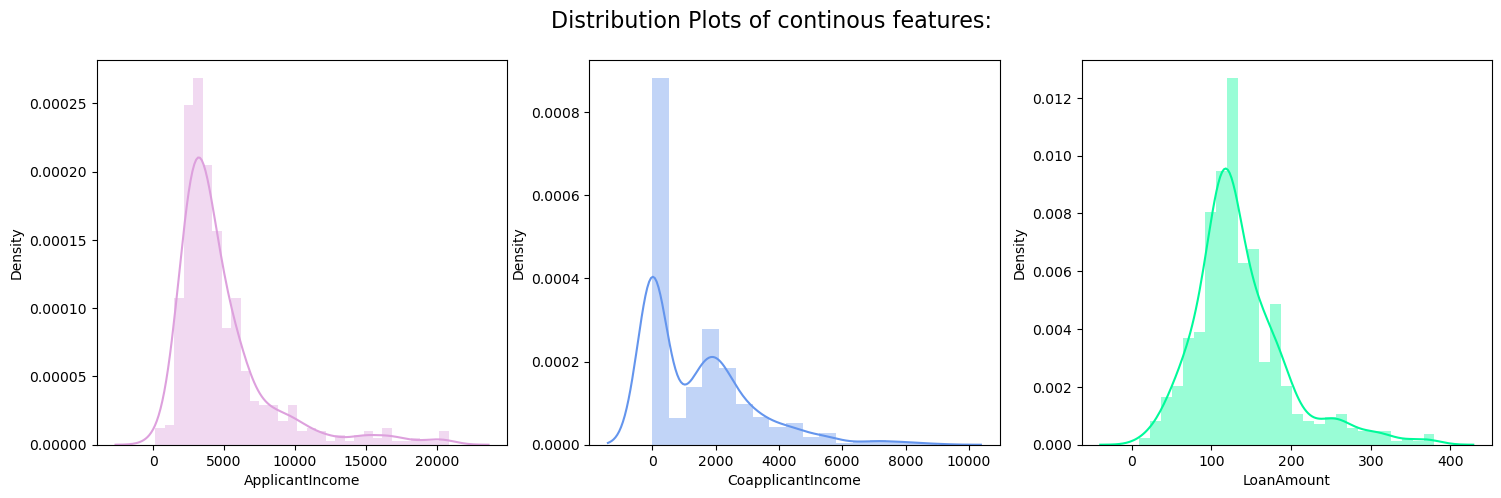

In [43]:
clist = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
color_list = ['plum', 'cornflowerblue', 'mediumspringgreen']
plt.figure(figsize = (18, 5))
plt.suptitle("Distribution Plots of continous features:", fontsize=16)
for i in range(0, len(clist)):
    plt.subplot(1, 3, i+1)
    sns.distplot(ds1[clist[i]], color = color_list[i])

Some skewness is present in 'ApplicantIncome' and 'CoapplicantIncome'. We will check it again after the scaling of data.

## CORRELATION:
Checking the correlation between the features and the target variables to see the relationship between them

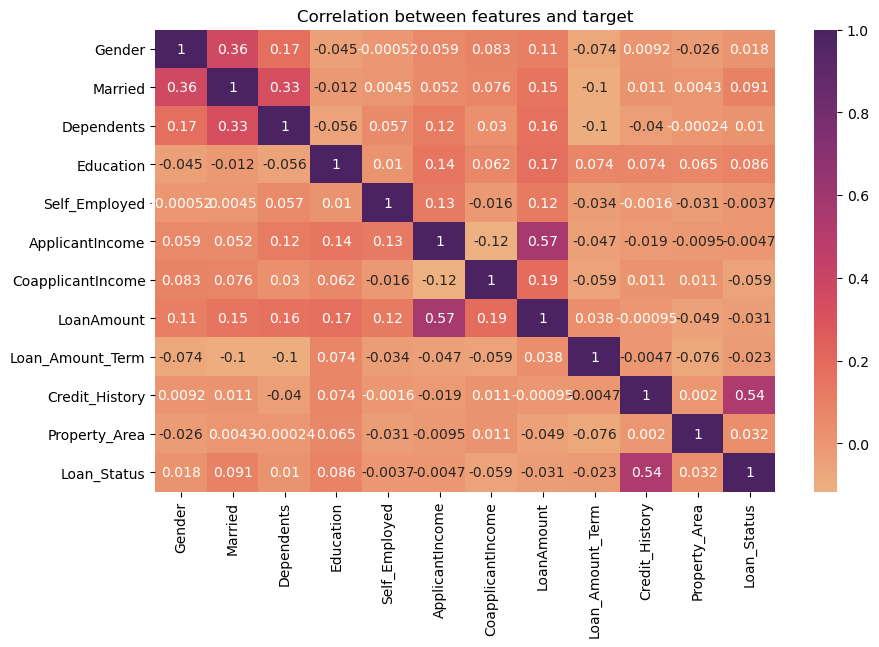

In [45]:
plt.figure(figsize = (10,6))
plt.title("Correlation between features and target")
sns.heatmap(ds.corr(), annot = True, cmap = 'flare')

plt.show()

From the correlation heatmap, we see that the **'Loan_Status' is highly correlated to the 'Credit_History' of the peron**. Also, ***'LoanAmount' and 'ApplicantIncome' are highly correlated to each other***. 

## SKEWNESS:
We saw from the distribution plots that skewness are present in the data. We will check and remove the skewness from the data.

In [47]:
ds1.loc[:,'ApplicantIncome':'Loan_Amount_Term'].skew()

ApplicantIncome      2.290558
CoapplicantIncome    1.391540
LoanAmount           1.260976
Loan_Amount_Term    -2.402112
dtype: float64

'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' are positively skewed and 'Loan_Amount_Term' is negatively skewed. We will remove positive skew by taking square root of that column and negative skew by cubing the columns.

In [48]:
skew_list = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
# positive skew
for i in skew_list:
    ds1[i] = np.sqrt(ds1[i])

# negative skew
ds1['Loan_Amount_Term'] = (ds1['Loan_Amount_Term'])**3

In [49]:
# checking skewness again
ds1.loc[:,'ApplicantIncome':'Loan_Amount_Term'].skew()

ApplicantIncome      1.350340
CoapplicantIncome    0.280447
LoanAmount           0.395554
Loan_Amount_Term     0.357888
dtype: float64

Still some skewness is present in 'ApplicantIncome' so we take log of that column

In [50]:
ds1['ApplicantIncome'] = np.log(ds1['ApplicantIncome'])
ds1.loc[:,'ApplicantIncome':'Loan_Amount_Term'].skew()

ApplicantIncome     -0.065510
CoapplicantIncome    0.280447
LoanAmount           0.395554
Loan_Amount_Term     0.357888
dtype: float64

## SCALING:
We have looked at the correlatioon between different features and target variable. We encoded the categorical values and handled the null values. Also removed the skewness from the continous values. We will now scale the dataset using Min-Max Scaler.

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scale = MinMaxScaler()
ds1.loc[:,'Gender':'Property_Area'] = scale.fit_transform(ds1.loc[:,'Gender':'Property_Area'])
ds1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.000000,1.0,0.0,0.742530,0.000000,0.482275,0.421866,1.0,1.0,1
1,1.0,1.0,0.333333,1.0,0.0,0.693091,0.409791,0.504057,0.421866,1.0,0.0,0
2,1.0,1.0,0.000000,1.0,1.0,0.607203,0.000000,0.310668,0.421866,1.0,1.0,1
3,1.0,1.0,0.000000,0.0,0.0,0.576868,0.512429,0.482275,0.421866,1.0,1.0,1
4,1.0,0.0,0.000000,1.0,0.0,0.747697,0.000000,0.538048,0.421866,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.000000,1.0,0.0,0.600332,0.000000,0.328985,0.421866,1.0,0.0,1
610,1.0,1.0,1.000000,1.0,0.0,0.670814,0.000000,0.201567,0.052720,1.0,0.0,1
611,1.0,1.0,0.333333,1.0,0.0,0.807823,0.163481,0.782484,0.421866,1.0,1.0,1
612,1.0,1.0,0.666667,1.0,0.0,0.795156,0.000000,0.647209,0.421866,1.0,1.0,1


We see that we have scaled the dataframe.
## DATA IMBALANCE:
If the dataset is imbalanced, it will result in bias and variance. Also, the model made with this data can be overfitted or underfitted. Hence, we will check to see if the data is imbalanced and then treat it.

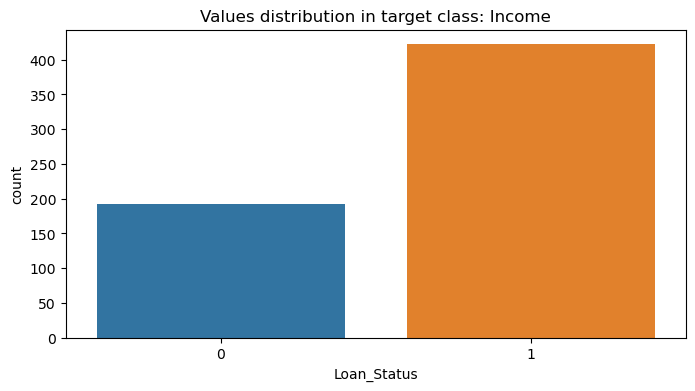

In [53]:
plt.figure(figsize = (8, 4))
plt.title("Values distribution in target class: Income")
sns.countplot(data = ds1, x = 'Loan_Status')
plt.show()

As we see that the dataset imbalanced with more values of loan sanctioned then as conpared to loans not sanctioned. We will balance the dataset using the oversampler SMOTETomek.

In [54]:
from imblearn.combine import SMOTETomek
x = ds1.loc[:,'Gender':'Property_Area']
y = ds1.loc[:,'Loan_Status']
smk = SMOTETomek()
x_new, y_new = smk.fit_resample(x, y)
print(x_new.shape, y_new.shape)

(798, 11) (798,)


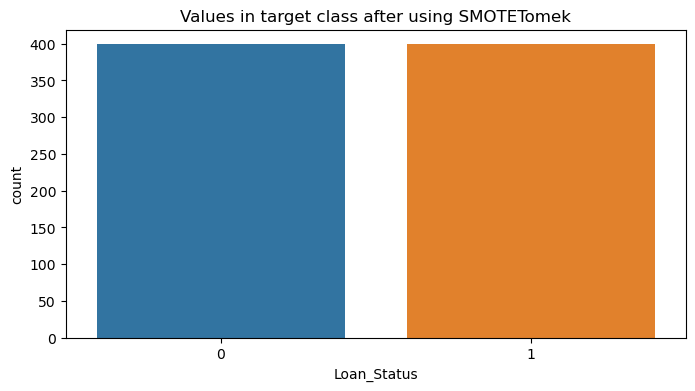

In [55]:
plt.figure(figsize = (8, 4))
plt.title("Values in target class after using SMOTETomek")
sns.countplot(x = y_new)
plt.show()

Data is now balanced.



# MODEL BUILDING:
Starting with spliting the dataset into training and testing data. For that we check to find out the best possible random state.

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

max_accuracy = 0
best_rs = 0
for i in range(1, 150):
    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.25, random_state = i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_accuracy: # after each iteration, acc is replace by the best possible accuracy
        max_accuracy = acc
        best_rs = i
print(f"Best Random State is {best_rs}, {max_accuracy*100}")

Best Random State is 9, 77.0


In [60]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size = 0.25, random_state = 9)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(598, 11) (200, 11) (598,) (200,)


In [61]:
''' Importing all the classification models '''
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [62]:
# For Logistic Regression
lg = LogisticRegression()
lg.fit(x_train, y_train)
pred_lg = lg.predict(x_test)
print("Accuracy Score of Logistic Regression model is", accuracy_score(y_test, pred_lg)*100)

# For Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
pred_dtc = dtc.predict(x_test)
print("Accuracy Score of Decision Tree Classifier model is", accuracy_score(y_test, pred_dtc)*100)

# For K-Nearest Neighbour Classifier
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
pred_knc = knc.predict(x_test)
print("Accuracy Score of K-Nearest Neighbour Classifier model is", accuracy_score(y_test, pred_knc)*100)

# For Support Vector Classifier
svc = SVC(kernel = 'rbf')
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
print("Accuracy Score of Support Vector Classifier model is", accuracy_score(y_test, pred_svc)*100)

# For Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)
print("Accuracy Score of Random Forest model is", accuracy_score(y_test, pred_rfc)*100)

# For MultinomialNB
nb = MultinomialNB() # making the Multinomial Naive Bayes class
nb.fit(x_train, y_train) # fitting the model
pred_nb = nb.predict(x_test) # predicting the values
print("Accuracy Score of MultinomialNB model is", accuracy_score(y_test, pred_nb)*100)

# For ADA Boost Classifier
ada= AdaBoostClassifier()
ada.fit(x_train, y_train) # fitting the model
pred_ada = ada.predict(x_test) # predicting the values
print("Accuracy Score of ADA Boost model is", accuracy_score(y_test, pred_ada)*100)

Accuracy Score of Logistic Regression model is 77.0
Accuracy Score of Decision Tree Classifier model is 73.0
Accuracy Score of K-Nearest Neighbour Classifier model is 78.5
Accuracy Score of Support Vector Classifier model is 74.0
Accuracy Score of Random Forest model is 90.5
Accuracy Score of MultinomialNB model is 60.0
Accuracy Score of ADA Boost model is 75.5


From the accuracy score, the best model accuracy is given by Random Forest Classifier Model.

## CROSS VALIDATION:
we will cross validate the model to avoid the overfitting or underfitting of the model.

In [63]:
from sklearn.model_selection import cross_val_score

lg_scores = cross_val_score(lg, x_new, y_new, cv = 5) # cross validating the model
print(lg_scores) # accuracy scores of each cross validation cycle
print(f"Mean of accuracy scores is for Logistic Regression is {lg_scores.mean()*100}\n")

dtc_scores = cross_val_score(dtc, x_new, y_new, cv = 5)
print(dtc_scores)
print(f"Mean of accuracy scores is for Decision Tree Classifier is {dtc_scores.mean()*100}\n")

knc_scores = cross_val_score(knc, x_new, y_new, cv = 5)
print(knc_scores)
print(f"Mean of accuracy scores is for KNN Classifier is {knc_scores.mean()*100}\n")

svc_scores = cross_val_score(svc, x_new, y_new, cv = 5)
print(svc_scores)
print(f"Mean of accuracy scores is for SVC Classifier is {svc_scores.mean()*100}\n")

rfc_scores = cross_val_score(rfc, x_new, y_new, cv = 5)
print(rfc_scores)
print(f"Mean of accuracy scores is for Random Forest Classifier is {rfc_scores.mean()*100}\n")

nb_scores = cross_val_score(nb, x_new, y_new, cv = 5)
print(nb_scores)
print(f"Mean of accuracy scores is for MultinomialNB is {nb_scores.mean()*100}\n")

ada_scores = cross_val_score(ada, x_new, y_new, cv = 5)
print(ada_scores)
print(f"Mean of accuracy scores is for ADA Boost Classifier is {ada_scores.mean()*100}\n")

[0.69375    0.74375    0.65       0.68553459 0.67924528]
Mean of accuracy scores is for Logistic Regression is 69.04559748427673

[0.78125    0.76875    0.825      0.77358491 0.8427673 ]
Mean of accuracy scores is for Decision Tree Classifier is 79.82704402515724

[0.7375     0.7625     0.75       0.77358491 0.78616352]
Mean of accuracy scores is for KNN Classifier is 76.19496855345912

[0.68125    0.75       0.625      0.72327044 0.74842767]
Mean of accuracy scores is for SVC Classifier is 70.55896226415095

[0.8125     0.84375    0.875      0.88679245 0.91823899]
Mean of accuracy scores is for Random Forest Classifier is 86.7256289308176

[0.6625     0.7375     0.63125    0.67295597 0.65408805]
Mean of accuracy scores is for MultinomialNB is 67.16588050314465

[0.69375    0.73125    0.725      0.79874214 0.79874214]
Mean of accuracy scores is for ADA Boost Classifier is 74.9496855345912



In [64]:
# Checking for difference between accuracy and mean accuracies.
lis3 = ['Logistic Regression','Decision Tree Classifier','KNeighbors Classifier','SVC', 'Random Forest Classifier', 
        'MultinomialNB', 'ADA Boost Classifier']

lis1 = [accuracy_score(y_test, pred_lg)*100, accuracy_score(y_test, pred_dtc)*100, accuracy_score(y_test, pred_knc)*100, 
        accuracy_score(y_test, pred_svc)*100, accuracy_score(y_test, pred_rfc)*100, accuracy_score(y_test, pred_nb)*100,
        accuracy_score(y_test, pred_ada)*100]

lis2 = [lg_scores.mean()*100, dtc_scores.mean()*100, knc_scores.mean()*100, svc_scores.mean()*100, rfc_scores.mean()*100, 
        nb_scores.mean()*100, ada_scores.mean()*100]

for i in range(0, 7):
    dif = (lis1[i]) - (lis2[i])
    print(lis3[i], dif)

Logistic Regression 7.954402515723274
Decision Tree Classifier -6.827044025157235
KNeighbors Classifier 2.3050314465408803
SVC 3.4410377358490507
Random Forest Classifier 3.7743710691823935
MultinomialNB -7.165880503144649
ADA Boost Classifier 0.5503144654088032


The least difference between the mean accuracies given by cross validation and accuracy is for the Decision Tree Model.
So we will tune both the Decision Tree and Random Forest Classifier, and compare their performance to during evaluation.

## HYPERPARAMETER TUNING:


In [65]:
from sklearn.model_selection import GridSearchCV

# Decision Tree Tuning
dtc = DecisionTreeClassifier()
parameters = { 'criterion' : ['gini', 'entropy'], 'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,15,16,17,18,19,20]}
gs = GridSearchCV(estimator = dtc, param_grid = parameters, scoring = 'f1', cv = 5)
gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.7527836779849405
{'criterion': 'gini', 'max_depth': 1}


Best parameters for Decision Tree Classifier are 'criterion': 'gini', 'max_depth': 1

In [66]:
dtc = DecisionTreeClassifier(criterion= 'gini', max_depth= 1)
dtc.fit(x_train, y_train)
print(dtc.score(x_train, y_train))
pred_dtc = dtc.predict(x_test)

0.68561872909699


In [67]:
# Random Forest Tuning
rfc = RandomForestClassifier()
param = dict()
param['criterion'] = ['gini', 'entropy']
param['n_estimators'] = [1, 2, 4, 8, 10, 16, 32, 64, 100, 200]
param['min_samples_split'] = [1,2,5,8,10,15,20,25,50,55,60,80,100]


gs = GridSearchCV(estimator = rfc, param_grid = param, scoring='f1', cv = 5, n_jobs = 3)
gs.fit(x_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.824647159306242
{'criterion': 'gini', 'min_samples_split': 5, 'n_estimators': 200}


Best parameters for random forest classifier are 'criterion': 'gini', 'min_samples_split': 5, 'n_estimators': 200

In [68]:
rfc = RandomForestClassifier(criterion = 'gini', min_samples_split = 5, n_estimators = 200)
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
pred_rfc = rfc.predict(x_test)

0.9866220735785953


We have tuned both the models.

# MODEL EVALUATION:
After the tuning of models, evaluating their performance using the classification report, confusion matrix and ROC curve.

**Decision Tree Classifier Evaluation**-

In [71]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix, classification_report

In [69]:
plt.style.use('ggplot')

Accuracy Score of DTC model is 0.745
Confusion matrix for DTC Model is
[[ 42  49]
 [  2 107]]
Classification Report of the DTC Model is
              precision    recall  f1-score   support

           0       0.95      0.46      0.62        91
           1       0.69      0.98      0.81       109

    accuracy                           0.74       200
   macro avg       0.82      0.72      0.71       200
weighted avg       0.81      0.74      0.72       200



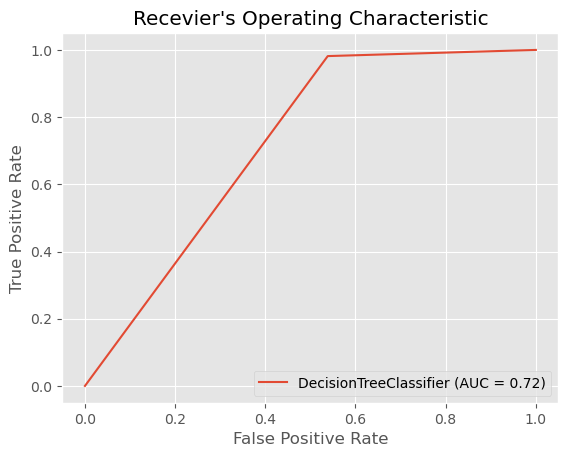

In [72]:
print("Accuracy Score of DTC model is", accuracy_score(y_test, pred_dtc))
print("Confusion matrix for DTC Model is")
print(confusion_matrix(y_test, pred_dtc))
print("Classification Report of the DTC Model is")
print(classification_report(y_test, pred_dtc))

plot_roc_curve(dtc, x_test, y_test)
plt.title("Recevier's Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

For the DTC model, we can see that the performance is not good. We have got an AUC score of 0.72.

**Random Forest Classifier Evaluation**-

Accuracy Score of RFC model is 88.5
Confusion matrix for RFC Model is
[[80 11]
 [12 97]]
Classification Report of the RFC Model is
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        91
           1       0.90      0.89      0.89       109

    accuracy                           0.89       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.89      0.89       200



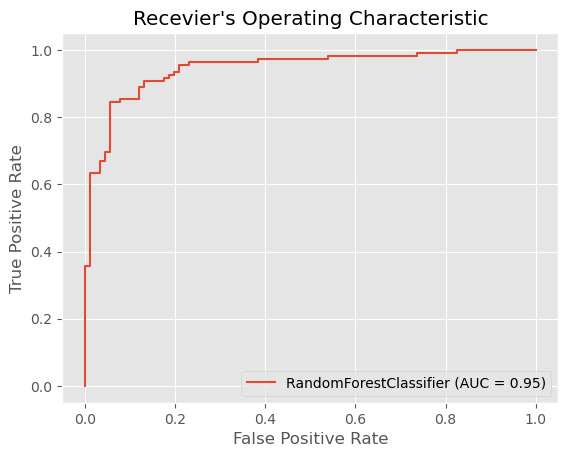

In [73]:
print("Accuracy Score of RFC model is", accuracy_score(y_test, pred_rfc)*100)
print("Confusion matrix for RFC Model is")
print(confusion_matrix(y_test, pred_rfc))
print("Classification Report of the RFC Model is")
print(classification_report(y_test, pred_rfc))

plot_roc_curve(rfc, x_test, y_test) # arg. are model name, feature testing data, label testing data.
plt.title("Recevier's Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

We have a very good performance from RFC model. The f1-score and accuracy that we get is 0.89. The AUC score for the RF model is 0.95. 

We will visualise the prediction results using histogram.

In [74]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [79]:
plt.style.use('default')

In [80]:
act_pos = y_test[y_test == 1]
pred_pos = pred_rfc[pred_rfc == 1]
act_neg = y_test[y_test == 0]
pred_neg = pred_rfc[pred_rfc == 0]

fig1 = go.Figure()

fig1.add_traces(go.Histogram(x = act_pos, name='Actual Yes', marker_color='springgreen', opacity=0.9))

fig1.add_traces(go.Histogram(x = pred_pos, name='Predicted Yes', marker_color='mediumspringgreen', opacity=0.9))

fig1.add_traces(go.Histogram(x = act_neg, name='Actual No', marker_color='peru', opacity=0.9))

fig1.add_traces(go.Histogram(x = pred_neg, name='Predicted No', marker_color='tan', opacity=0.9))

fig1.update_layout(title_text="RFC Model's Loan Status Prediction Result", xaxis_title_text='Actual and Predicted',
                   yaxis_title_text='Counts', bargap=0.1, bargroupgap=0.3)

fig1.show()

![](https://www.theeagleinn.com/wp-content/uploads/2017/11/stacked_page_divider_image-1378934968-tapestry-d.png)

# SERIALISATION:
Saving the best model (RFC) as an object:

In [81]:
import joblib
joblib.dump(rfc, 'Loan_Status_Prediction_Model.obj') # saving the model as an object

['Loan_Status_Prediction_Model.obj']